# Multiple Linear Regression

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import kagglehub
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### define database

In [35]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles")

df = pd.read_csv(path + r"/CO2 Emissions_Canada.csv")

In [36]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### preprocessing

In [37]:
cdf = df[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]

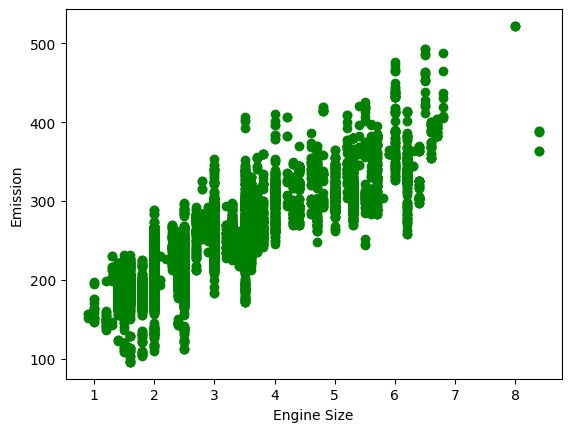

In [38]:
plt.scatter(cdf["Engine Size(L)"], cdf["CO2 Emissions(g/km)"], color="green")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [47]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]
train.shape, test.shape

((5933, 4), (1452, 4))

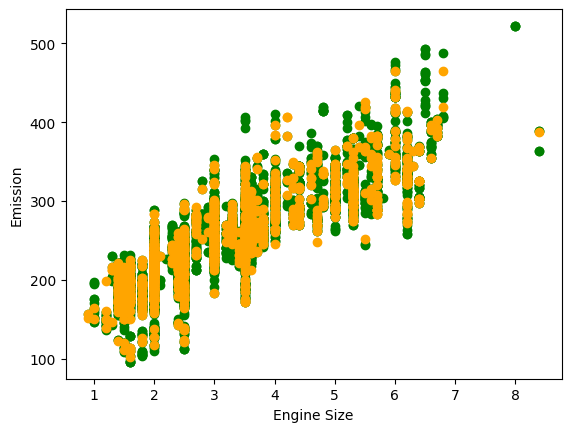

In [48]:
plt.scatter(train["Engine Size(L)"], train["CO2 Emissions(g/km)"], color="green")
plt.scatter(test["Engine Size(L)"], test["CO2 Emissions(g/km)"], color="orange")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

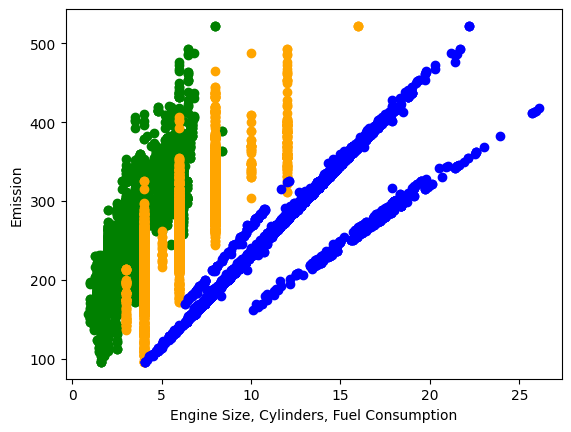

In [49]:
plt.scatter(train["Engine Size(L)"], train["CO2 Emissions(g/km)"], color="green")
plt.scatter(train["Cylinders"], train["CO2 Emissions(g/km)"], color="orange")
plt.scatter(train["Fuel Consumption Comb (L/100 km)"], train["CO2 Emissions(g/km)"], color="blue")
plt.xlabel("Engine Size, Cylinders, Fuel Consumption")
plt.ylabel("Emission")
plt.show()

### define model

In [ ]:
mymodel = LinearRegression()

x_train = np.asanyarray(train[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]])
y_train = np.asanyarray(train[["CO2 Emissions(g/km)"]])

mymodel.fit(x_train, y_train)

print(f"coefficient : {mymodel.coef_[0][0]}, {mymodel.coef_[0][1]}, {mymodel.coef_[0][2]} | intercept : {mymodel.intercept_[0]}")

coefficient : 5.308551879621102, 6.760364961220105, 13.193698045913086 | intercept : 50.96493467748385


### model evaluation

In [53]:
x_test = np.asanyarray(test[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]])
y_test = np.asanyarray(test[["CO2 Emissions(g/km)"]])

y_pred_test = mymodel.predict(x_test)

In [55]:
mse = np.mean((y_test - y_pred_test) ** 2)
mae = np.mean(np.absolute(y_test - y_pred_test))
rmse = np.mean((y_test - y_pred_test) ** 2) ** 0.5
rmae = np.mean(np.absolute(y_test - y_pred_test)) ** 0.5
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error : {mse} | Mean Absolute Error : {mae} | Root Mean Squared Error : {rmse} | Root Mean Absolute Error : {rmae} | R2 Score : {r2}")

Mean Squared Error : 410.52577690980877 | Mean Absolute Error : 13.389306176002734 | Root Mean Squared Error : 20.26143570702256 | Root Mean Absolute Error : 3.6591400869606967 | R2 Score : 0.8754534094684417


### Practice
##### Try to use a multiple linear regression with the same dataset, but this time use FUEL CONSUMPTION in CITY and FUEL CONSUMPTION in HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

### preprocessing

In [56]:
mdf = df[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "CO2 Emissions(g/km)"]]

mdf.shape

(7385, 5)

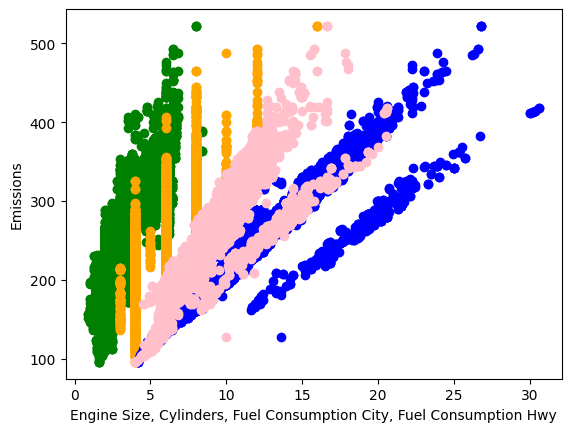

In [58]:
plt.scatter(mdf["Engine Size(L)"], mdf["CO2 Emissions(g/km)"], color="green")
plt.scatter(mdf["Cylinders"], mdf["CO2 Emissions(g/km)"], color="orange")
plt.scatter(mdf["Fuel Consumption City (L/100 km)"], mdf["CO2 Emissions(g/km)"], color="blue")
plt.scatter(mdf["Fuel Consumption Hwy (L/100 km)"], mdf["CO2 Emissions(g/km)"], color="pink")
plt.xlabel("Engine Size, Cylinders, Fuel Consumption City, Fuel Consumption Hwy")
plt.ylabel("Emissions")
plt.show()

In [61]:
msk = np.random.rand(len(df)) < 0.8

train, test = mdf[msk], mdf[~msk]
train.shape, test.shape

((5907, 5), (1478, 5))

### model definition

In [64]:
mymodel = LinearRegression()

x_train = np.asanyarray(train[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)"]])
y_train = np.asanyarray(train[["CO2 Emissions(g/km)"]])

mymodel.fit(x_train, y_train)

print(f"model coefficient : {mymodel.coef_[0][0]}, {mymodel.coef_[0][1]}, {mymodel.coef_[0][2]} | model intercept : {mymodel.intercept_[0]}")

model coefficient : 5.374925304463153, 6.821044399171239, 7.042089910427401 | model intercept : 51.45079471036655


### model evaluation

In [65]:
x_test = np.asanyarray(test[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)"]])
y_test = np.asanyarray(test[["CO2 Emissions(g/km)"]])

y_pred_test = mymodel.predict(x_test)

In [66]:
mse = np.mean((y_test - y_pred_test) ** 2)
mae = np.mean(np.absolute(y_test - y_pred_test))
rmse = np.mean((y_test - y_pred_test) ** 2) ** 0.5
rmae = np.mean(np.absolute(y_test - y_pred_test)) ** 0.5
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error : {mse} | Mean Absolute Error : {mae} | Root Mean Squared Error : {rmse} | Root Mean Absolute Error : {rmae} | R2 Score : {r2}")

Mean Squared Error : 392.73649698495177 | Mean Absolute Error : 13.407581311141376 | Root Mean Squared Error : 19.817580502799824 | Root Mean Absolute Error : 3.6616364253078673 | R2 Score : 0.8841344250330545
